In [2]:

import numpy as np 
import pandas as pd

import os
from tqdm import tqdm
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [50]:
train_path= '../input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
validation_path='../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'
test_path='../input/face-mask-12k-images-dataset/Face Mask Dataset/Test'

In [62]:
import seaborn as sns

In [4]:
ht=80
wt=80
epochs = 50
batch_size = 128

In [5]:
train_datagen = ImageDataGenerator(
    
    rescale=1. / 255,
    rotation_range = 10,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


test_datagen = ImageDataGenerator(rescale=1. / 255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(wt, ht),
    batch_size=batch_size,
    class_mode='binary')

Found 10000 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(
    validation_path,
    target_size=(wt, ht),
    batch_size=batch_size,
    class_mode='binary')

Found 800 images belonging to 2 classes.


In [55]:
test=ImageDataGenerator(rescale=1. / 255,)
test_images=test.flow_from_directory(
    test_path,
    target_size=(wt, ht),
    batch_size=batch_size,
    class_mode='binary'
)

Found 992 images belonging to 2 classes.


In [8]:
from tensorflow.keras import backend as k
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.applications.vgg19 import VGG19

In [17]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [42]:
def model(input_size = (82,82,3)):
    inputs=Input(input_size)
    conv11=Conv2D(32, kernel_size=(3,3), activation='relu' ,kernel_initializer = 'he_normal',padding = 'same' ) (inputs)
    pool1=MaxPooling2D()(conv11)
    conv21=Conv2D(64, kernel_size=(3,3), activation='relu' ,kernel_initializer = 'he_normal',padding = 'same' ) (pool1)
    pool2=MaxPooling2D()(conv21)
    conv31=Conv2D(128, kernel_size=(3,3), activation='relu' ,kernel_initializer = 'he_normal',padding = 'same' ) (pool2)
    pool3=MaxPooling2D()(conv31)
    conv41=Conv2D(256, kernel_size=(3,3), activation='relu' ,kernel_initializer = 'he_normal',padding = 'same' ) (pool3)
    pool41=MaxPooling2D()(conv41)
    conv12=Conv2D(32, kernel_size=(3,3), activation='relu' ,kernel_initializer = 'he_normal',padding = 'same' ) (inputs)
    pool1=MaxPooling2D()(conv12)
    conv22=Conv2D(64, kernel_size=(3,3), activation='relu' ,kernel_initializer = 'he_normal',padding = 'same' ) (pool1)
    pool2=MaxPooling2D()(conv22)
    conv32=Conv2D(128, kernel_size=(3,3), activation='relu' ,kernel_initializer = 'he_normal',padding = 'same' ) (pool2)
    pool3=MaxPooling2D()(conv32)
    conv42=Conv2D(256, kernel_size=(3,3), activation='relu' ,kernel_initializer = 'he_normal',padding = 'same' ) (pool3)
    pool42=MaxPooling2D()(conv42)
    
    merge6 = concatenate([pool41,pool42], axis = 3)
    
    pool5=MaxPooling2D()(merge6)
    flat=Flatten()(pool5)
    dense1=Dense(1024, activation='relu')(flat)
    dense2=Dense(64,activation='relu')(dense1)
    drop=Dropout(0.5)(dense2)
    out=Dense(1, activation='sigmoid') (drop)
    
    model = Model(inputs,out)
    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [43]:
m1=model()

In [44]:
m1.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 82, 82, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 82, 82, 32)   896         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 82, 82, 32)   896         input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_61 (MaxPooling2D) (None, 41, 41, 32)   0           conv2d_61[0][0]                  
____________________________________________________________________________________________

In [45]:
history=m1.fit_generator(
    train_generator,
    steps_per_epoch=10000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size
)

Epoch 1/50
78/78 [==============================] - 39s 493ms/step - loss: 0.6284 - accuracy: 0.6938 - val_loss: 0.2535 - val_accuracy: 0.9102
Epoch 2/50
78/78 [==============================] - 38s 485ms/step - loss: 0.2700 - accuracy: 0.8993 - val_loss: 0.1941 - val_accuracy: 0.9284
Epoch 3/50
78/78 [==============================] - 38s 486ms/step - loss: 0.2141 - accuracy: 0.9231 - val_loss: 0.1282 - val_accuracy: 0.9544
Epoch 4/50
78/78 [==============================] - 38s 487ms/step - loss: 0.1935 - accuracy: 0.9289 - val_loss: 0.0982 - val_accuracy: 0.9753
Epoch 5/50
78/78 [==============================] - 38s 486ms/step - loss: 0.1603 - accuracy: 0.9445 - val_loss: 0.0929 - val_accuracy: 0.9727
Epoch 6/50
78/78 [==============================] - 38s 486ms/step - loss: 0.1365 - accuracy: 0.9511 - val_loss: 0.0741 - val_accuracy: 0.9805
Epoch 7/50
78/78 [==============================] - 38s 486ms/step - loss: 0.1239 - accuracy: 0.9572 - val_loss: 0.0689 - val_accuracy: 0.9844

In [47]:
from matplotlib import pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


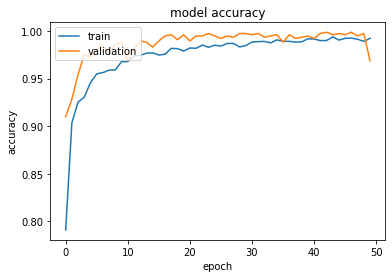

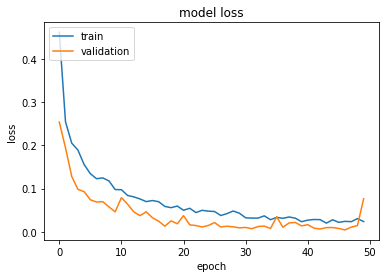

In [49]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [58]:
score = m1.evaluate(test_images, verbose = 1)

8/8 [==============================] - 2s 249ms/step - loss: 0.0811 - accuracy: 0.9738


In [59]:
score

[0.0811295211315155, 0.9737903475761414]

In [64]:
m1.save("model.h5")